# Introduction and Image Enhancement 
 


We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array and also Matplotlib module to display an image.

In [4]:
# import numpy
import numpy as np

# import PIL module
from PIL import Image

# import Matplotlib
import matplotlib.pyplot as plt

# for fundamental math functions
import math


## Example Usages

In [ ]:
# reading an image and convert to array
myimage = np.array(Image.open('image.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('image.jpg')

In [ ]:
# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


## Fundamental Functions

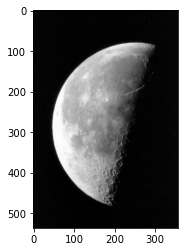

In [5]:
def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    image = np.array(Image.open(fname)) # reading file
    return image # returning image as array

# test
image = openImage('img/moon.png')
plt.imshow(image, cmap='gray')

In [6]:
# Algorithm without loop
""" 
    //Algorithm logic//
    * Transform the 2D image to 1D vector
    * Sort the elements in the vector
    * Find the indexes where first k and last k with findMinBound() and findMaxBound()
    * ((last index of k - first index of k) + 1) gives us how many k in the image
"""
def findMinBound(array,start,end,k): # find min index of k
    avg = math.floor((start+end)/2)
    if((end-start)==1):
        return avg+1
    
    if(array[avg]>=k):
        return findMinBound(array,start,avg,k)
    elif(array[avg]<k):
        return findMinBound(array,avg,end,k)

def findMaxBound(array,start,end,k): # find max index of k
    avg = math.ceil((start+end)/2)
    if((end-start)==1):
        return avg-1
    
    if(array[avg]>k):
        return findMaxBound(array,start,avg,k)
    elif(array[avg]<=k):
        return findMaxBound(array,avg,end,k)

def countPixels(I,k):
    """ Array*int -> int"""
    imageVector = I.ravel() # transform 2D to 1D
    imageVector = np.sort(imageVector,-1,'mergesort') # sort 1D array
    max = findMaxBound(imageVector,0,imageVector.size-1,k)
    min = findMinBound(imageVector,0,imageVector.size-1,k)
    return max-min+1

# Algorithm without loop end


# Naive algorithm
"""
def countPixels(I,k):
    count = 0
    imageVector = I.ravel()
    for i in np.arange(imageVector.size):
        if(imageVector[i] == k):
            count += 1
    return count
"""
# Naive algorithm end

#test
image = openImage('img/moon.png')
print("Number of pixels with value of 10 : " + str(countPixels(image,10)))


Number of pixels with value of 10 : 1486


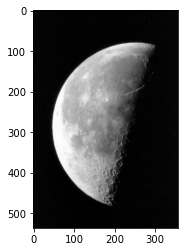

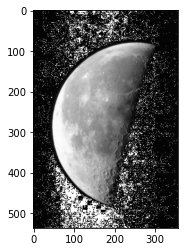

In [23]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    image = I.copy()
    for i in np.arange(image.shape[0]):
        for j in np.arange(image.shape[1]):
            if(image[i][j] == k1):
                image[i][j]=k2
    return image

#test
image = openImage('img/moon.png')
plt.imshow(image, cmap='gray')
plt.show()
imageReplaced = replacePixels(image,1,255)
plt.imshow(imageReplaced, cmap='gray')
plt.show()


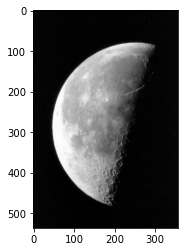

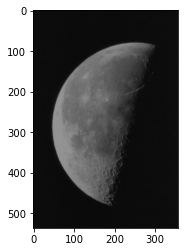

In [7]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    return I.copy()*(float(k2)-float(k1))/255.0+float(k1)

#test
image = openImage('img/moon.png')
plt.imshow(image, cmap='gray')
plt.show()
normalizedImage = normalizeImage(image,10,150)
plt.imshow(normalizedImage, cmap='gray', vmin=0, vmax=255)
plt.show()

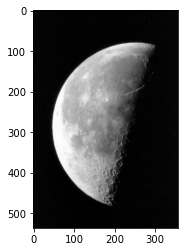

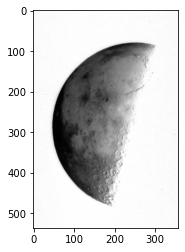

In [8]:
def inverteImage(I):
    """ Array -> Array """
    image = (255-I.copy())
    return image

image = openImage('img/moon.png')
plt.imshow(image, cmap='gray')
plt.show()
invertedImage = inverteImage(image)
plt.imshow(invertedImage, cmap='gray')
plt.show()

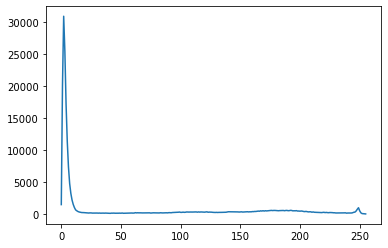

In [9]:
def computeHistogram(I):
    """ Array -> list[int] """
    histogram = [0]*256
    for x in range(0,256):
        histogram[x] = countPixels(I,x)
    return histogram

#test
image = openImage('img/moon.png')
histogram = computeHistogram(image)
plt.plot(histogram)
plt.show()



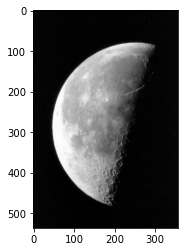

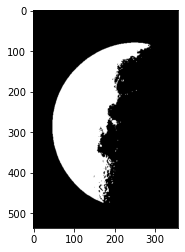

In [10]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    image = I.copy()
    for i in np.arange(image.shape[0]):
        for j in np.arange(image.shape[1]):
            if(image[i][j] < s):
                image[i][j] = 0
            else:
                image[i][j] = 255
    return image

#test
image = openImage('img/moon.png')
plt.imshow(image, cmap='gray')
plt.show()
alteredImage = thresholdImage(image,127)
plt.imshow(alteredImage, cmap='gray')
plt.show()

## Playing With Fundamental Functions

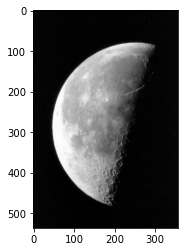

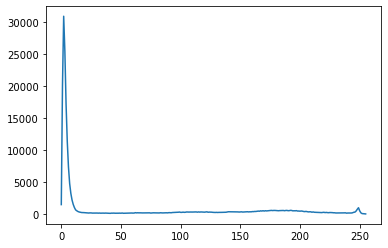

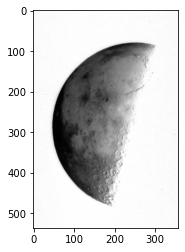

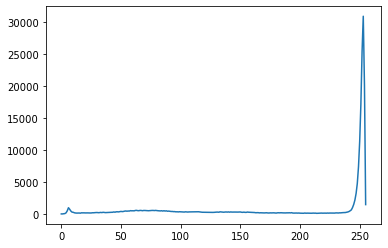

In [11]:
image = openImage('img/moon.png')
plt.imshow(image, cmap='gray')
plt.show()
histogram = computeHistogram(image)
plt.plot(histogram)
plt.show()
invertedImage = inverteImage(image)
plt.imshow(invertedImage, cmap='gray')
plt.show()
histogramInverted = computeHistogram(invertedImage)
plt.plot(histogramInverted)
plt.show()

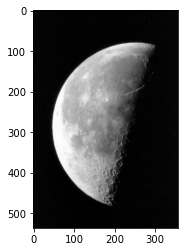

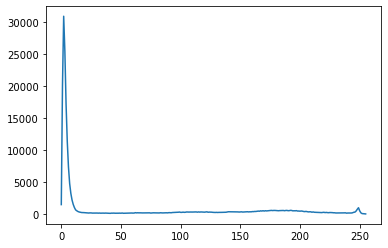

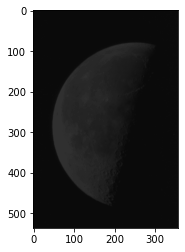

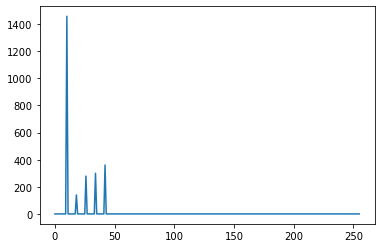

In [12]:
image = openImage('img/moon.png')
plt.imshow(image, cmap='gray')
plt.show()
histogram = computeHistogram(image)
plt.plot(histogram)
plt.show()
normalizedImage = normalizeImage(image,10,50)
plt.imshow(normalizedImage, cmap='gray', vmin=0, vmax=255)
plt.show()
histogramNormalized = computeHistogram(normalizedImage)
plt.plot(histogramNormalized)
plt.show()

# Result Image Observations ;
# Image contrast and dynamic range are reduced, we have lost some details because some pixel values correspond 
# to same value due to the smaller interval. And lastly the brightness of the image is reduced due to dark intervals.

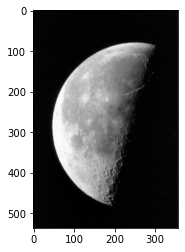

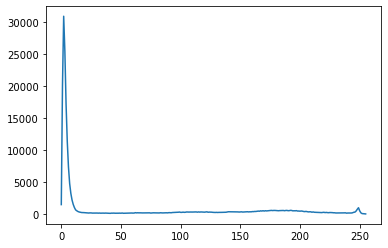

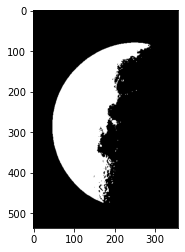

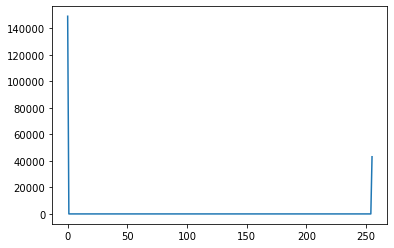

In [13]:
image = openImage('img/moon.png')
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()
histogram = computeHistogram(image)
plt.plot(histogram)
plt.show()
alteredImage = thresholdImage(image,127)
plt.imshow(alteredImage, cmap='gray', vmin=0, vmax=255)
plt.show()
histogramAltered = computeHistogram(alteredImage)
plt.plot(histogramAltered)
plt.show()

# Result Image Observations ;
# Image contrast increased. We have lost a lot of details due to the interval change from [0,255] to binary
# dynamic range.

## Generating images

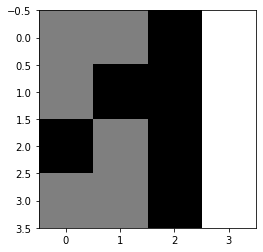

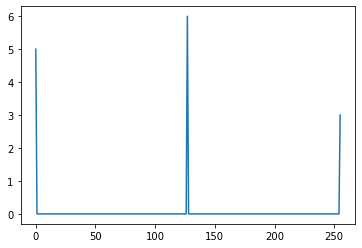

In [14]:
array = np.array([[127, 127, 0, 255], [127, 0, 0, 255], [0, 127, 0, 255],[127, 127, 0, 255]])
plt.imshow(array, cmap='gray')
plt.show()
histogram = computeHistogram(array)
plt.plot(histogram)
plt.show()

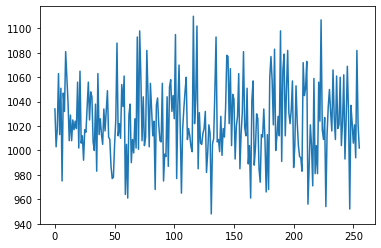

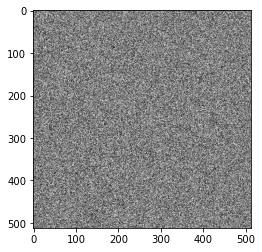

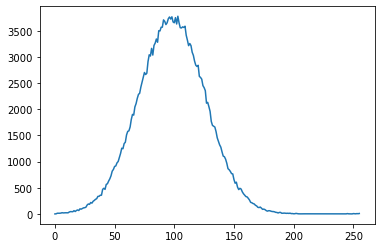

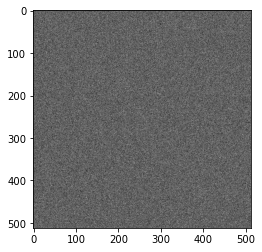

In [16]:
import numpy.matlib

# 512x512 uniform distribution
array = np.random.randint(256,size=(512,512))
# 512x512 gaussian distribution with a mean of 128 and a standart deviation of 16
arrayG = np.random.normal(loc=128, scale=16 ,size=(512,512))

# normalization
max = 0
min = np.inf
for i in np.arange(512):
    for j in np.arange(512):
        if arrayG[i][j] > max:
            max = arrayG[i][j]
        if arrayG[i][j] < min:
            min = arrayG[i][j]
            
arrayG = arrayG*((255-0)/(max-min))

for i in np.arange(512):
    for j in np.arange(512):
        arrayG[i][j] = int(arrayG[i][j])
        arrayG[i][j] = arrayG[i][j] + 128
        if arrayG[i][j] > 255:
            arrayG[i][j] = arrayG[i][j] -255 
        
        
histogramArray = computeHistogram(array)
histogramArrayG = computeHistogram(arrayG)
plt.plot(histogramArray)
plt.show()
plt.imshow(array, cmap='gray')
plt.show()
plt.plot(histogramArrayG)
plt.show()
plt.imshow(arrayG, cmap='gray')
plt.show()


# Discussion

# Because of the gaussian distribution most of the values are placed around 128. On the other hand, uniform
# distribution histogram shows us that all the values placed between 0-255 randomly. Visually, gaussian distribution
# have smooth noise because it's gathering pixel values around 128. So this is useful for creating noise effect
# with more control than uniform distribution.


## Image Manipulation
In this section, we will work with image `img/pout.png`. 

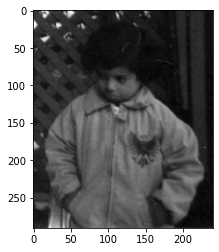

In [46]:
image = openImage('img/pout.png')
plt.imshow(image, cmap='gray')
plt.show()

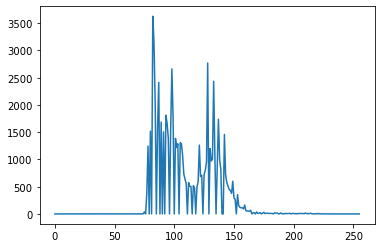

Extrema of the image : 224


In [48]:
histogram = computeHistogram(image)
plt.plot(histogram)
plt.show()

#Extrema of the image
extrema = 0
for i in np.arange(image.shape[0]):
    for j in np.arange(image.shape[1]):
        if extrema < image[i][j]:
            extrema = image[i][j]
            
print("Extrema of the image : " + str(extrema))

# Discussion about the quality of image

# Contrast and brightness are low, so it is hard to detect the edges of the objects. Histogram equalization can 
# solve this problem. We can also apply exponential transformation for increase the contrast but applying histogram
# equalization will give us better result because exponential transformation at the higher values will accumulate 
# on 255 limit. There is also some noise in the image.

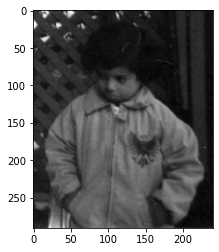

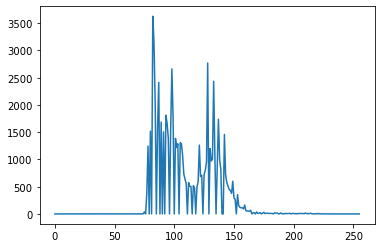

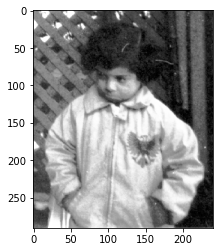

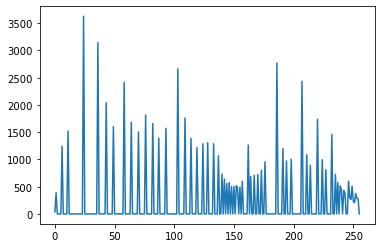

In [50]:
def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    cumulativeHistogram = [0]*256
    cumulativeHistogram[0] = h[0]
    image = I.copy()
    for i in range(1,256):
        cumulativeHistogram[i] = h[i]+cumulativeHistogram[i-1]
    for i in np.arange(image.shape[0]):
        for j in np.arange(image.shape[1]):
            image[i][j] = int(255.0*cumulativeHistogram[image[i][j]]/(image.shape[0]*image.shape[1]))
    return image
    
#test
image = openImage('img/pout.png')
histogram = computeHistogram(image)
newImage = histogramEqualization(image,histogram)
newHistogram = computeHistogram(newImage)
plt.imshow(image, cmap='gray')
plt.show()
plt.plot(histogram)
plt.show()
plt.imshow(newImage, cmap='gray')
plt.show()
plt.plot(newHistogram)
plt.show()



# Discussion

# First of all, our image more visible after equalization but noises also more visible. we have lost some pixel 
# values because of the equalization but before this process we couldn't clearly see the image. Contrast and 
# brightness are increased.
